In [7]:
import sys
import pandas as pd

from sqlalchemy import create_engine
from joblib import dump, load
from pathlib import Path
# import dill as pickle

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from plotly.graph_objs import Bar
import joblib


In [5]:
def tokenize(text: str):
    """
    Process raw text input
    :param text: raw text input
    :return: cleaned text tokens
    """
    # https://www.mackelab.org/sbi/faq/question_03/
    # https://stackoverflow.com/questions/44911539/pickle-picklingerror-args0-from-newobj-args-has-the-wrong-class-with-hado

    url_regex = "http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text.lower())
    tokens = [w for w in tokens if w not in ENGLISH_STOPWORDS]
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).strip()
        clean_tokens.append(clean_tok)

    return clean_tokens

In [3]:
engine = create_engine("sqlite:///data/DisasterResponse.db")
df = pd.read_sql_table("DisasterTweets", engine)

In [4]:
df.head()

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
model_long = joblib.load("models/classifier_gridLong.pkl")
model_grid = joblib.load("models/classifier_grid.pkl")
model = joblib.load("models/classifier.pkl")

In [6]:
model_long.predict(["My parent's are gone"])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [7]:
model_grid.predict(["My parent's are gone"])

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [8]:
model.predict(["My parent's are gone"])[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [9]:
model.predict_proba(["My parent's are gone"])

[array([[0.2       , 0.77733333, 0.02266667]]),
 array([[0.75, 0.25]]),
 array([[1., 0.]]),
 array([[0.64, 0.36]]),
 array([[0.91, 0.09]]),
 array([[1., 0.]]),
 array([[0.97, 0.03]]),
 array([[0.93, 0.07]]),
 array([[1., 0.]]),
 array([[1.]]),
 array([[0.93, 0.07]]),
 array([[0.85, 0.15]]),
 array([[0.82, 0.18]]),
 array([[0.8, 0.2]]),
 array([[0.9, 0.1]]),
 array([[0.99, 0.01]]),
 array([[1., 0.]]),
 array([[0.99, 0.01]]),
 array([[0.75, 0.25]]),
 array([[0.94, 0.06]]),
 array([[0.98, 0.02]]),
 array([[0.93, 0.07]]),
 array([[1., 0.]]),
 array([[1., 0.]]),
 array([[1., 0.]]),
 array([[1., 0.]]),
 array([[0.98, 0.02]]),
 array([[0.95, 0.05]]),
 array([[0.85166667, 0.14833333]]),
 array([[0.96666667, 0.03333333]]),
 array([[1., 0.]]),
 array([[1., 0.]]),
 array([[0.94, 0.06]]),
 array([[1., 0.]]),
 array([[0.96, 0.04]]),
 array([[0.73, 0.27]])]

In [21]:
df.related.max()

2.0

In [25]:
df.military.value_counts()

0.0    25347
1.0      860
Name: military, dtype: int64

In [24]:
df.columns

Index(['id', 'message', 'original', 'genre', 'related', 'request', 'offer',
       'aid_related', 'medical_help', 'medical_products', 'search_and_rescue',
       'security', 'military', 'child_alone', 'water', 'food', 'shelter',
       'clothing', 'money', 'missing_people', 'refugees', 'death', 'other_aid',
       'infrastructure_related', 'transport', 'buildings', 'electricity',
       'tools', 'hospitals', 'shops', 'aid_centers', 'other_infrastructure',
       'weather_related', 'floods', 'storm', 'fire', 'earthquake', 'cold',
       'other_weather', 'direct_report'],
      dtype='object')

In [6]:
freq_dict = {}
for col in df.columns[4:]:
    freq_dict.update({col: df[col].sum()})

In [7]:
freq_dict

{'related': 20298.0,
 'request': 4480.0,
 'offer': 119.0,
 'aid_related': 10878.0,
 'medical_help': 2087.0,
 'medical_products': 1314.0,
 'search_and_rescue': 724.0,
 'security': 471.0,
 'military': 860.0,
 'child_alone': 0.0,
 'water': 1674.0,
 'food': 2930.0,
 'shelter': 2319.0,
 'clothing': 406.0,
 'money': 604.0,
 'missing_people': 299.0,
 'refugees': 876.0,
 'death': 1196.0,
 'other_aid': 3448.0,
 'infrastructure_related': 1705.0,
 'transport': 1203.0,
 'buildings': 1335.0,
 'electricity': 534.0,
 'tools': 159.0,
 'hospitals': 283.0,
 'shops': 120.0,
 'aid_centers': 309.0,
 'other_infrastructure': 1151.0,
 'weather_related': 7302.0,
 'floods': 2158.0,
 'storm': 2448.0,
 'fire': 282.0,
 'earthquake': 2453.0,
 'cold': 530.0,
 'other_weather': 1376.0,
 'direct_report': 5080.0}

In [38]:
data_freq = pd.DataFrame.from_dict(freq_dict, orient="index", columns=["freq"])
data_freq

,freq
related,20298.0
request,4480.0
offer,119.0
aid_related,10878.0
medical_help,2087.0
medical_products,1314.0
search_and_rescue,724.0
security,471.0
military,860.0
child_alone,0.0


In [34]:
data_freq.columns

Index([0, 'freq'], dtype='object')

In [32]:
import plotly.express as px
fig = px.histogram(x=data_freq.index, y=data_freq.freq)
fig.show()

AttributeError: module 'plotly.express' has no attribute 'Bar'

In [33]:
len(df)

26207

In [39]:
import plotly.graph_objs as go

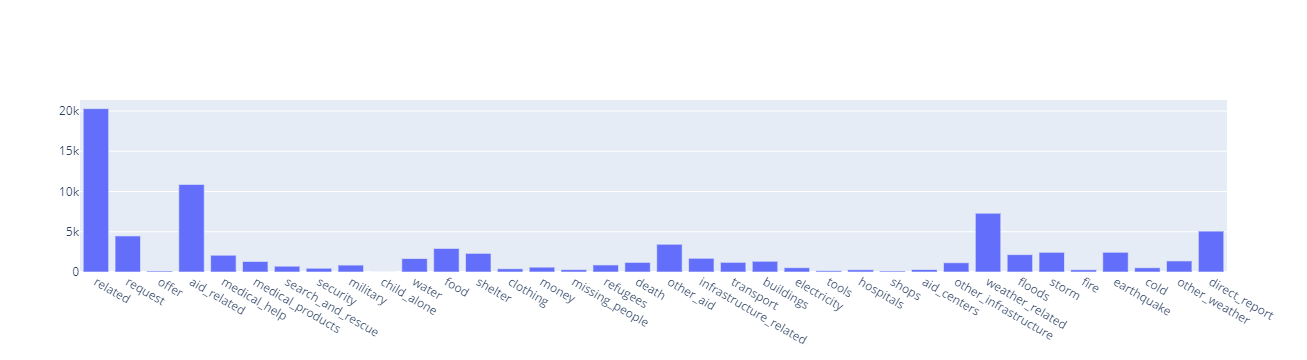

In [47]:
fig = go.Figure()
fig.add_trace(go.Bar(x=list(data_freq.index), y=data_freq.freq.values))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [49]:
cor = df[df.columns[4:]].corr()

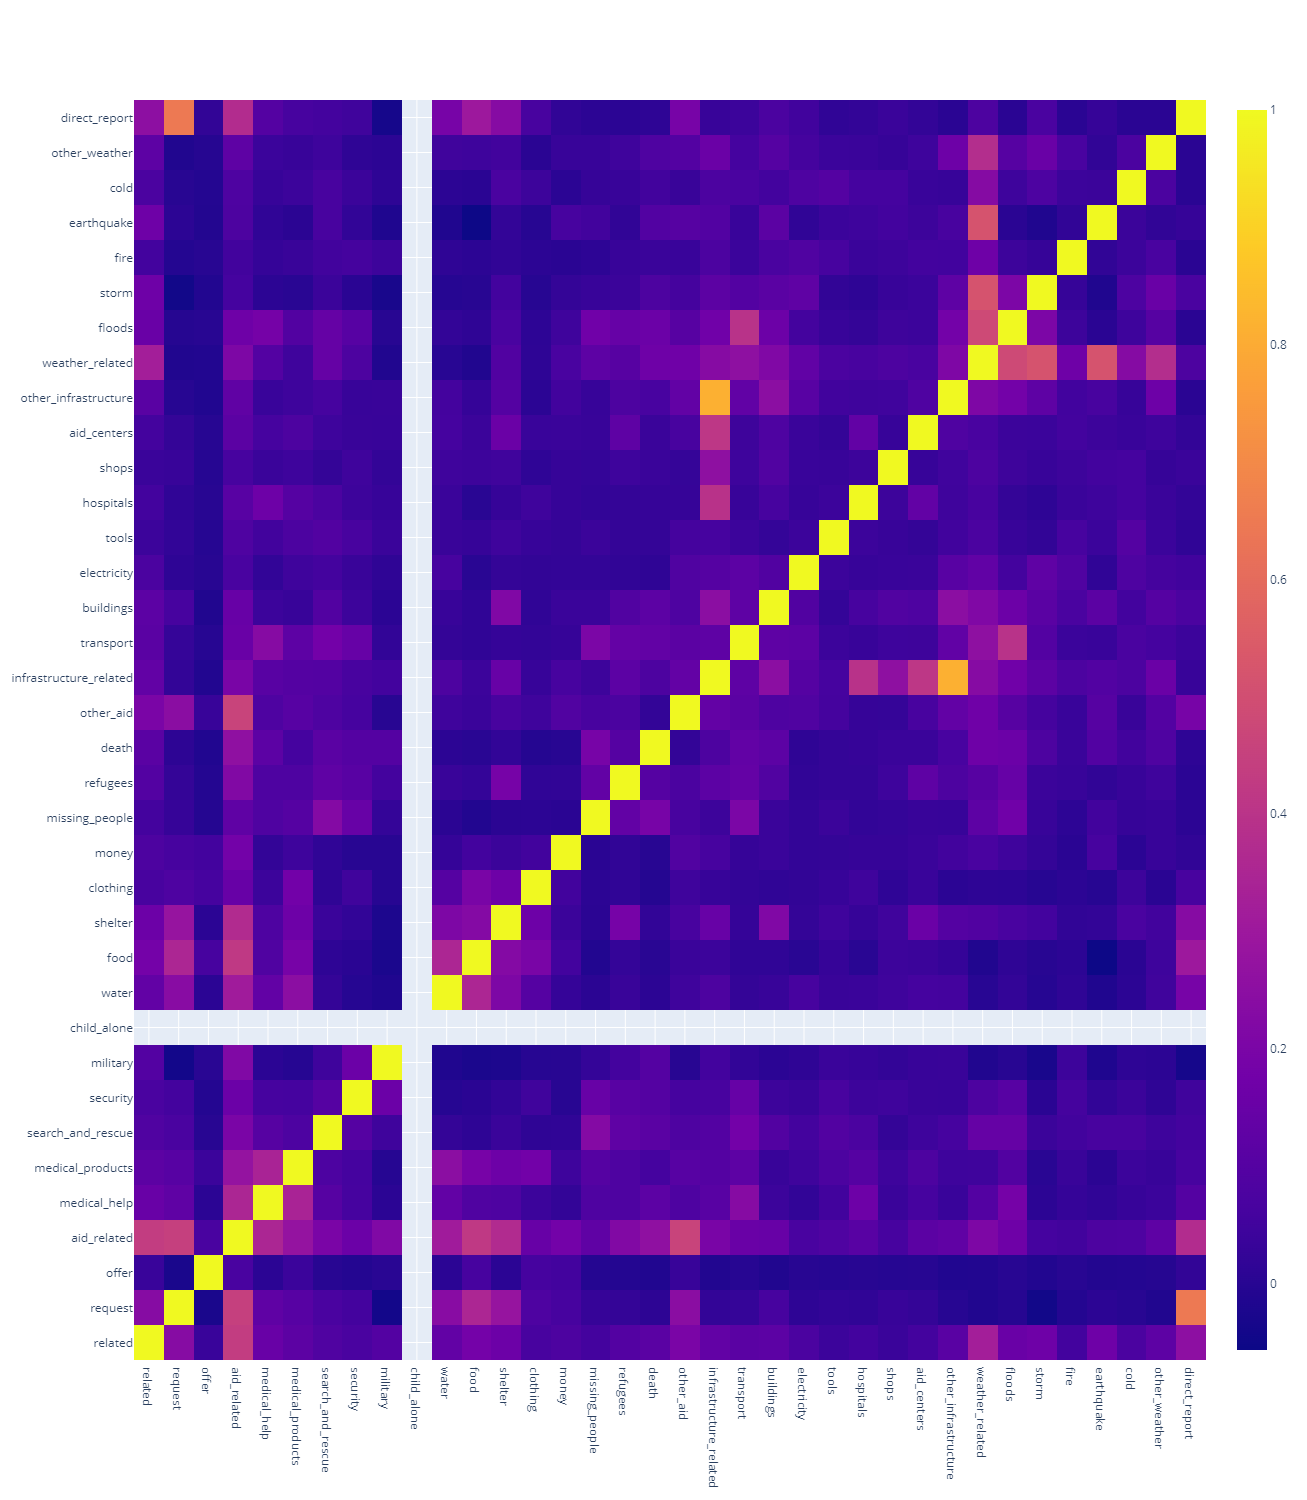

In [58]:
fig = go.Figure(data=go.Heatmap(
                   z=cor.to_numpy(),
                   x=df.columns[4:],
                   y=df.columns[4:],
                   hoverongaps = False))

fig.update_layout(
    xaxis_nticks=36,
    yaxis_nticks=36,
    width=1500,
    height=1500,)

fig.show()

In [5]:
df[df["related"]==2]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
117,146,Dans la zone de Saint Etienne la route de Jacm...,Nan zon st. etine rout jakmel la bloke se mize...,direct,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219,261,"Hygienic . .. , mobile toilets, batteries, gen...","ERS HYGIENIQUES, TOILETTES MOBILES, BATTERIES,...",direct,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
305,371,I am a surviver of the earthkaque see how you ...,Mwen se yon viktim nan katastrf ki sot pase a ...,direct,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
460,563,I am located in Route Freres- Impasse Fortin. ...,mou sou route fr impasse fortin pi wo maket gr...,direct,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,698,"Please people in Carrefour, Magloire Ambroide ...","Sil te ple moun nan kafou fy, avni maglwa ambw...",direct,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20317,23535,He said the government has provided a motorise...,None,news,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20488,23728,The Army has deployed a total of 72 columns in...,None,news,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22317,25732,"With a CERF allocation of almost $1.7 million,...",None,news,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23373,26927,"In this scenario, total housing financing need...",None,news,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
related_is_two = {}
for col in df[df["related"]==2].columns[4:]:
    related_is_two.update({col: df[df["related"]==2][col].sum()})
related_is_two

{'related': 384.0,
 'request': 0.0,
 'offer': 0.0,
 'aid_related': 0.0,
 'medical_help': 0.0,
 'medical_products': 0.0,
 'search_and_rescue': 0.0,
 'security': 0.0,
 'military': 0.0,
 'child_alone': 0.0,
 'water': 0.0,
 'food': 0.0,
 'shelter': 0.0,
 'clothing': 0.0,
 'money': 0.0,
 'missing_people': 0.0,
 'refugees': 0.0,
 'death': 0.0,
 'other_aid': 0.0,
 'infrastructure_related': 0.0,
 'transport': 0.0,
 'buildings': 0.0,
 'electricity': 0.0,
 'tools': 0.0,
 'hospitals': 0.0,
 'shops': 0.0,
 'aid_centers': 0.0,
 'other_infrastructure': 0.0,
 'weather_related': 0.0,
 'floods': 0.0,
 'storm': 0.0,
 'fire': 0.0,
 'earthquake': 0.0,
 'cold': 0.0,
 'other_weather': 0.0,
 'direct_report': 0.0}

In [7]:
df[df["related"] == 2]["related"] = 1

/tmp/ipykernel_3217/3075608351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["related"] == 2]["related"] = 1


In [10]:
df[df.loc[:, "related"] == 2] = 1

In [11]:
sum(df.loc[:, "related"] == 2)

0

In [44]:
class StartingVerbExtractor(BaseEstimator, TransformerMixin):

    def starting_verb(self, text):
        sentence_list = nltk.sent_tokenize(text)
        for sentence in sentence_list:
            pos_tags = nltk.pos_tag(tokenize(sentence))
            if len(pos_tags) >= 1:
                first_word, first_tag = pos_tags[0]
                if first_tag in ['VB', 'VBP'] or first_word == 'RT':
                    return True
        return False

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        X_tagged = pd.Series(X).apply(self.starting_verb)
        return pd.DataFrame(X_tagged)

In [9]:
def load_data(database_filepath: str):
    """
    Load sqlite database
    :param database_filepath: path to database file
    :return: tuple of data features, target variable and category names
    """
    engine = create_engine(f"sqlite:///{database_filepath}")
    df = pd.read_sql_table("DisasterTweets", engine)

    # TODO: drop child_alone column as it seems we have no instances of it being positive in
    #  dataset. Well do we want to do this?
    x = df.message.values
    y = df[df.columns[4:]].values
    category_names = df[df.columns[4:]].columns

    return x, y, category_names

In [19]:
nltk.download(["punkt", "wordnet", "averaged_perceptron_tagger", "omw-1.4", "stopwords"])
# set_loky_pickler("dill")
ENGLISH_STOPWORDS = stopwords.words("english")

[nltk_data] Downloading package punkt to /home/jaf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jaf/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jaf/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /home/jaf/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jaf/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
x = df.message.values
y = df[df.columns[4:]].values
category_names = df[df.columns[4:]].columns
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [45]:
starting_verb = StartingVerbExtractor()

In [46]:
vect = CountVectorizer(tokenizer=tokenize)

In [47]:
X_train[0]

'Hot Food- 2 Trays of Egg Casseroles for either Saturday , Nov. 10th or Sunday , Nov. 11th in the morning . Please let me know when & where this would be most useful .'

In [20]:
vect.fit(X_train[:2], Y_train[:2])

CountVectorizer(tokenizer=<function tokenize at 0x7fb7723d9430>)

In [22]:
vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenize(text: str)>,
 'vocabulary': None}

In [26]:
X_train[0]

'Hot Food- 2 Trays of Egg Casseroles for either Saturday , Nov. 10th or Sunday , Nov. 11th in the morning . Please let me know when & where this would be most useful .'

In [25]:
tokens = word_tokenize(X_train[0].lower())
tokens = [w for w in tokens if w not in ENGLISH_STOPWORDS]
tokens          

['hot',
 'food-',
 '2',
 'trays',
 'egg',
 'casseroles',
 'either',
 'saturday',
 ',',
 'nov.',
 '10th',
 'sunday',
 ',',
 'nov.',
 '11th',
 'morning',
 '.',
 'please',
 'let',
 'know',
 '&',
 'would',
 'useful',
 '.']

In [29]:
lemmatizer = WordNetLemmatizer()
clean_tokens = []
for tok in tokens:
    clean_tok = lemmatizer.lemmatize(tok).strip()
    clean_tokens.append(clean_tok)
clean_tokens

['hot',
 'food-',
 '2',
 'tray',
 'egg',
 'casserole',
 'either',
 'saturday',
 ',',
 'nov.',
 '10th',
 'sunday',
 ',',
 'nov.',
 '11th',
 'morning',
 '.',
 'please',
 'let',
 'know',
 '&',
 'would',
 'useful',
 '.']

In [31]:
def starting_verb(text):
    sentence_list = nltk.sent_tokenize(text)
    for sentence in sentence_list:
        pos_tags = nltk.pos_tag(tokenize(sentence))
        first_word, first_tag = pos_tags[0]
        if first_tag in ['VB', 'VBP'] or first_word == 'RT':
            return True
    return False

In [35]:
pos_tags = nltk.pos_tag(clean_tokens)
pos_tags

[('hot', 'JJ'),
 ('food-', 'JJ'),
 ('2', 'CD'),
 ('tray', 'NN'),
 ('egg', 'NN'),
 ('casserole', 'NN'),
 ('either', 'DT'),
 ('saturday', 'NN'),
 (',', ','),
 ('nov.', 'RB'),
 ('10th', 'CD'),
 ('sunday', 'NN'),
 (',', ','),
 ('nov.', 'JJ'),
 ('11th', 'CD'),
 ('morning', 'NN'),
 ('.', '.'),
 ('please', 'VB'),
 ('let', 'VB'),
 ('know', 'NNP'),
 ('&', 'CC'),
 ('would', 'MD'),
 ('useful', 'VB'),
 ('.', '.')]

In [37]:
first_word, first_tag = pos_tags[0]
print(first_word, first_tag)

hot JJ


In [38]:
if first_tag in ['VB', 'VBP'] or first_word == 'RT':
    print("yay")

In [48]:
def build_model():
    """
    Build Multioutput classifier Random Forest classifier model pipeline and
    run GridSearchCV to get optimised parameters
    :return: model pipeline
    """
    pipeline = Pipeline([
        ('features', FeatureUnion([
            ('text_pipeline', Pipeline([
                ('vect', CountVectorizer(tokenizer=tokenize)),
                ('tfidf', TfidfTransformer())
            ])),
            ('starting_verb', StartingVerbExtractor())
        ])),
    ])

    return pipeline

In [49]:
model = build_model()

In [51]:
xtrain_transformed = model.fit_transform(X_train)

In [56]:
hehe = xtrain_transformed[0].todok()

In [60]:
hehe.items()

dict_items([((0, 4), 0.16290834590954262), ((0, 99), 0.09223661496033192), ((0, 158), 0.0727482051333167), ((0, 517), 0.2413078157602939), ((0, 567), 0.255784980725053), ((0, 958), 0.15357692362254535), ((0, 5916), 0.28692044182057114), ((0, 9561), 0.24429380842586385), ((0, 9583), 0.2027367630248122), ((0, 11103), 0.27542926952138197), ((0, 13102), 0.18959877874562397), ((0, 15168), 0.11823808117804088), ((0, 15753), 0.16754572127006842), ((0, 17600), 0.15816020547701742), ((0, 18586), 0.4952637284558265), ((0, 20229), 0.10359922080665797), ((0, 23092), 0.1796737904402504), ((0, 25207), 0.17493935773134345), ((0, 26507), 0.255784980725053), ((0, 27456), 0.23177195097787598), ((0, 28555), 0.11130876601691377), ((0, 28999), 1.0)])